# Customer Segmentation and Analysis

Steps to solve the problem :

*   Importing Libraries.
*   Exploration of data.
*   Data Visualization.
*   Clustering using K-Means: 
    - Segmentation using Age and Spending Score,
    - Segmentation using Average Income and Spending Score
*   Selection of Clusters.
*   Ploting the Cluster Boundry and Clusters.
*   3D Plot of Clusters.



## Importing Libraries

In [70]:
import os 
import numpy as np # for numerical computing in Python
import pandas as pd # for data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Exploration (_Discover and Visualize the Data to Gain Insights_)

In [71]:
!wget -O MallCustomers.csv https://sagemaker-studio-591933579993-hqmmz6xgv3m.s3.amazonaws.com/Mall_Customers.csv

--2021-06-12 16:31:57--  https://sagemaker-studio-591933579993-hqmmz6xgv3m.s3.amazonaws.com/Mall_Customers.csv
Resolving sagemaker-studio-591933579993-hqmmz6xgv3m.s3.amazonaws.com (sagemaker-studio-591933579993-hqmmz6xgv3m.s3.amazonaws.com)... 52.217.39.100
Connecting to sagemaker-studio-591933579993-hqmmz6xgv3m.s3.amazonaws.com (sagemaker-studio-591933579993-hqmmz6xgv3m.s3.amazonaws.com)|52.217.39.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/csv]
Saving to: ‘MallCustomers.csv’

MallCustomers.csv   100%[===================>]   3.89K  --.-KB/s    in 0s      

2021-06-12 16:31:58 (59.2 MB/s) - ‘MallCustomers.csv’ saved [3981/3981]



In [72]:
!ls

MallCustomers.csv  sample_data


In [73]:
df = pd.read_csv('MallCustomers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [75]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [76]:
df.shape

(200, 5)

In [77]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [78]:
df.Gender.isin(['Male']).value_counts()

False    112
True      88
Name: Gender, dtype: int64

In [79]:
df.isnull().sum(axis=0)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization

[For Style reference](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

In [80]:
#plt.style.use('fivethirtyeight')

In [81]:
plt.style.use('default')

### **Histograms**

A histogram is a bar graph-like representation of data that buckets a range of outcomes into columns along the x-axis. The y-axis represents the number count or percentage of occurrences in the data for each column and can be used to visualize data distributions.

In [82]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

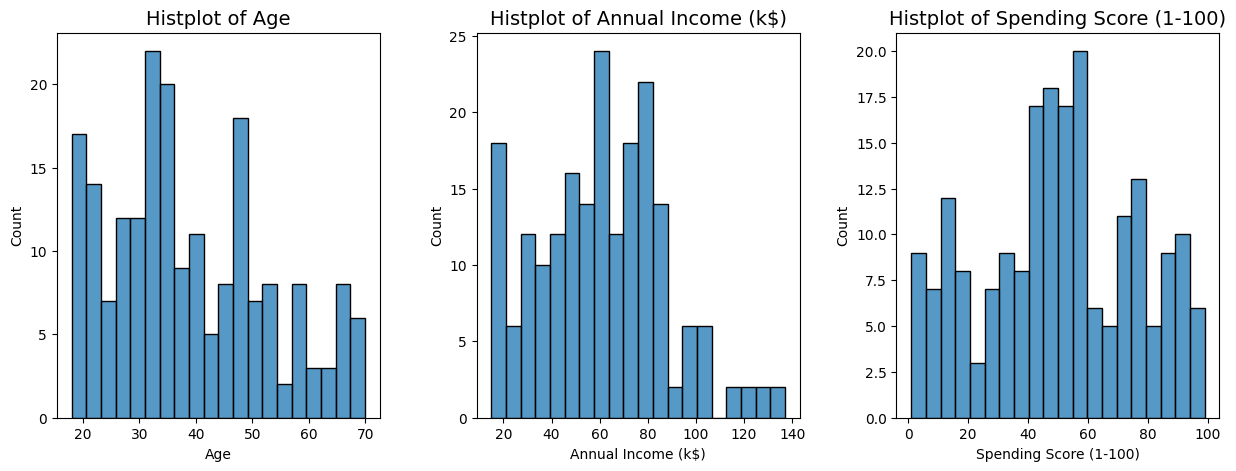

In [83]:
plt.figure(1, figsize=(15, 5))
n = 0
for x in df.columns[2:]:
    n += 1
    plt.subplot(1, 3, n)
    sns.histplot(df[x], bins=20)
    plt.title('Histplot of {}'.format(x), fontsize=14)
plt.subplots_adjust(wspace=0.3)
plt.show()

kde: If `True`, compute a kernel density estimate to smooth the distribution

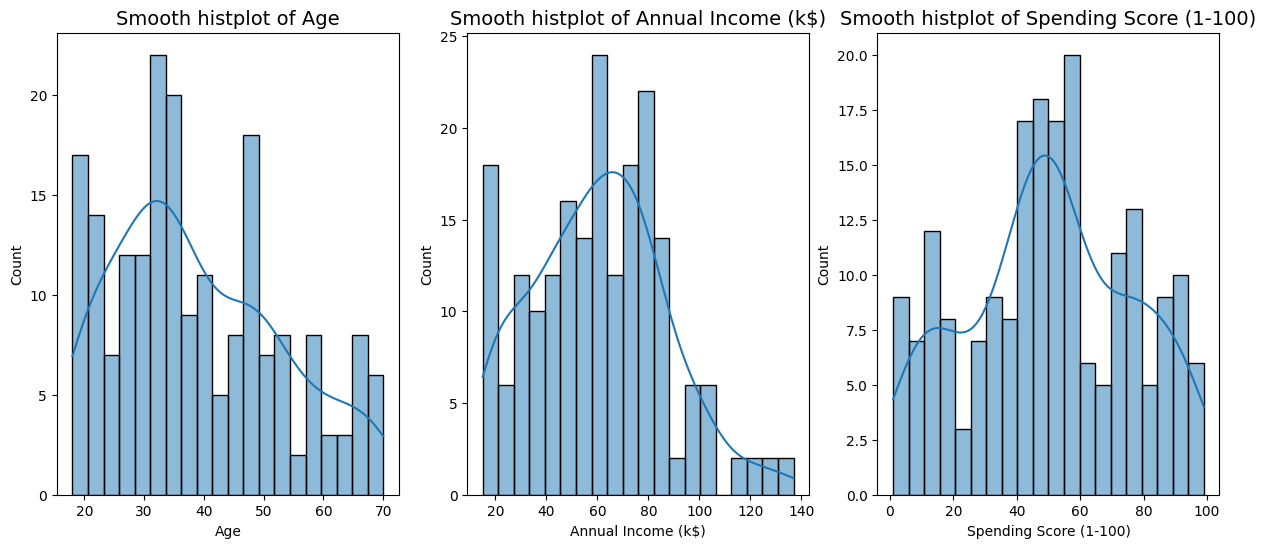

In [84]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in df.columns[2:]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5)
    sns.histplot(df[x], bins=20, kde=True)
    plt.title('Smooth histplot of {}'.format(x), fontsize=14)
plt.show()

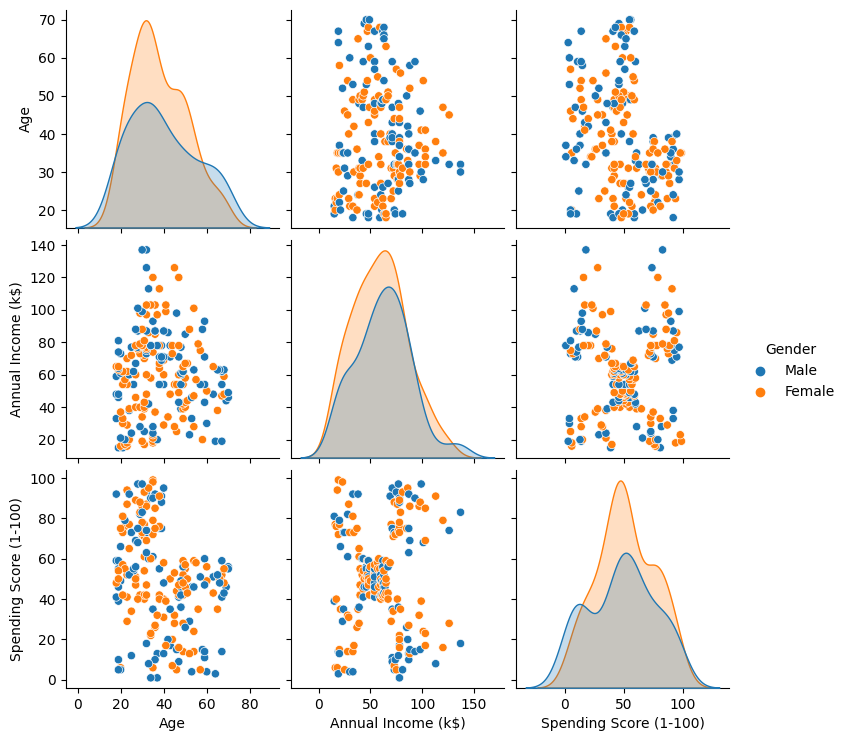

In [85]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender']],hue='Gender')

<Figure size 1800x1800 with 0 Axes>

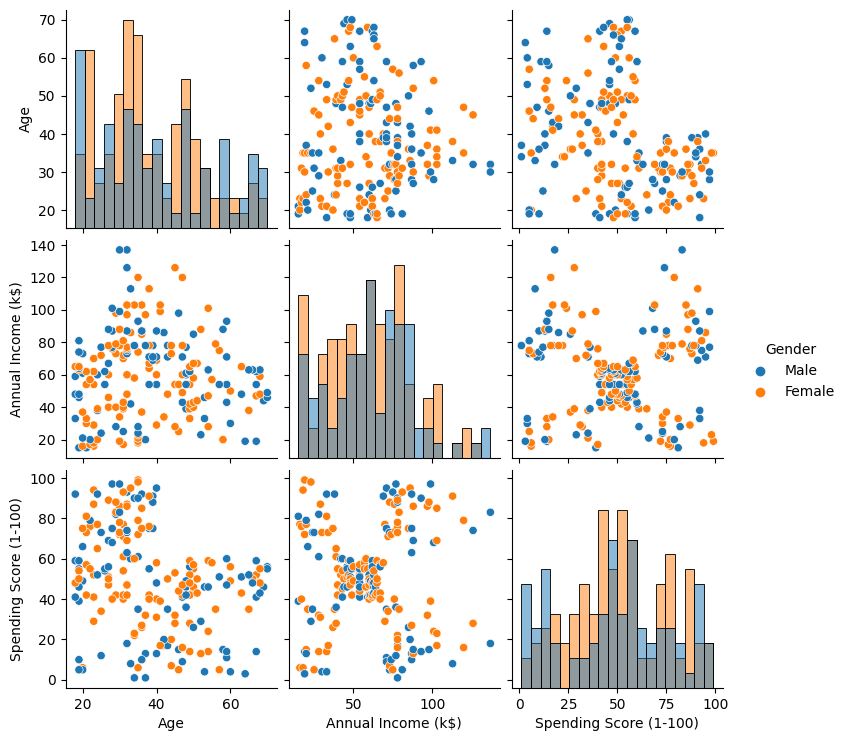

In [86]:
plt.figure(1, figsize=(18, 18))
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender']],hue='Gender',diag_kind="hist", diag_kws={'bins': 20})
plt.show()

### **Count Plot of Gender**

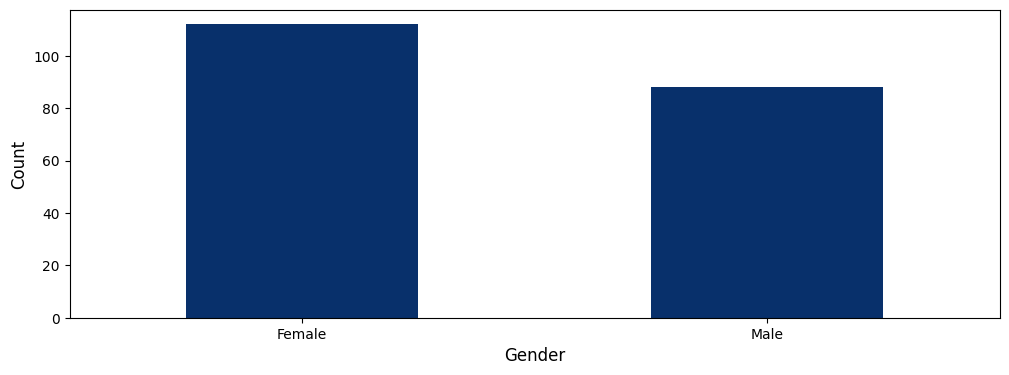

In [87]:
plt.figure(1, figsize=(12, 4))
df['Gender'].value_counts().plot(kind='bar', cmap='Blues_r')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation=0)
plt.show()

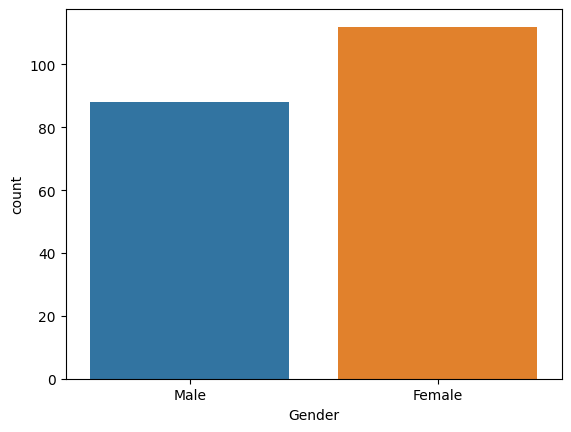

In [88]:
sns.countplot(x='Gender',data=df)

### **Looking for Correlations**

Since the dataset is not too large, you can easily compute the standard correlation
coefficient (also called Pearson’s r) between every pair of attributes using the corr()
method:

In [89]:
corr_matrix = df.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


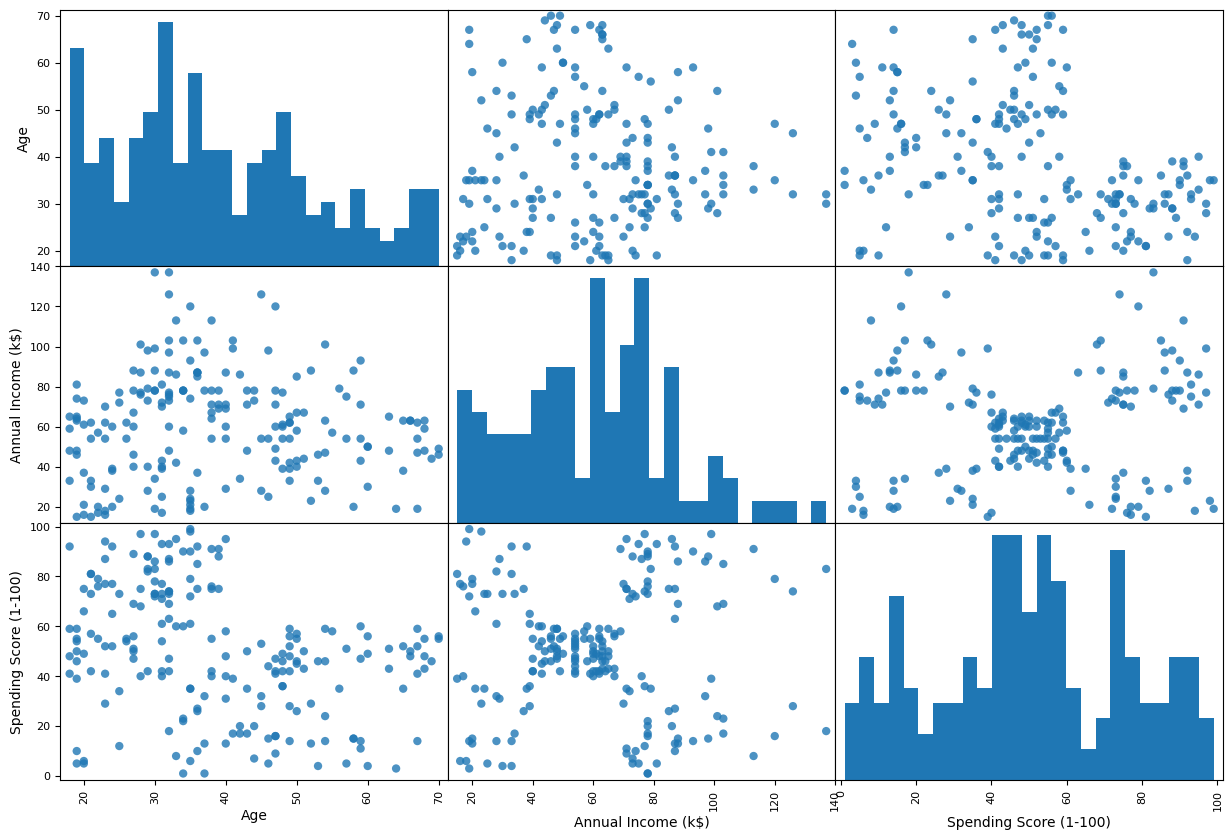

In [90]:
from pandas.plotting import scatter_matrix

attrbutes = df.columns[2:]
scatter_matrix(df[attrbutes], figsize=(15, 10), alpha=0.8, marker='o', diagonal='hist', hist_kwds={'bins': 25})
plt.show()

In [91]:
df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


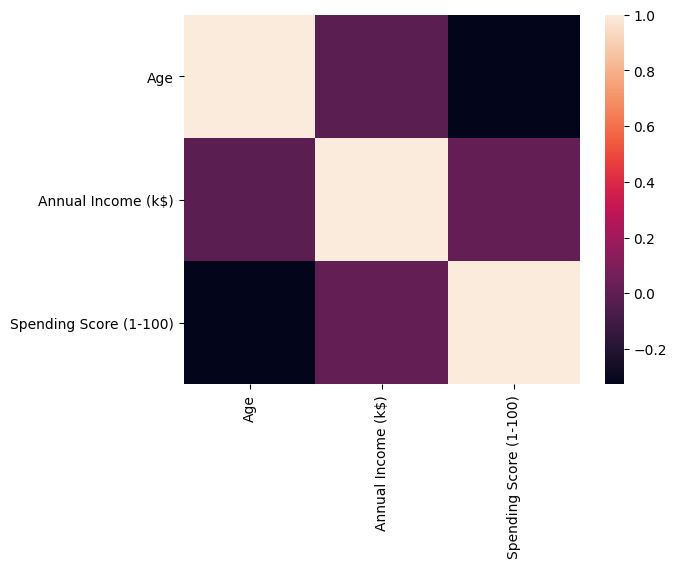

In [92]:
sns.heatmap(df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr())

### **Ploting the Relation between Age , Annual Income and Spending Score**

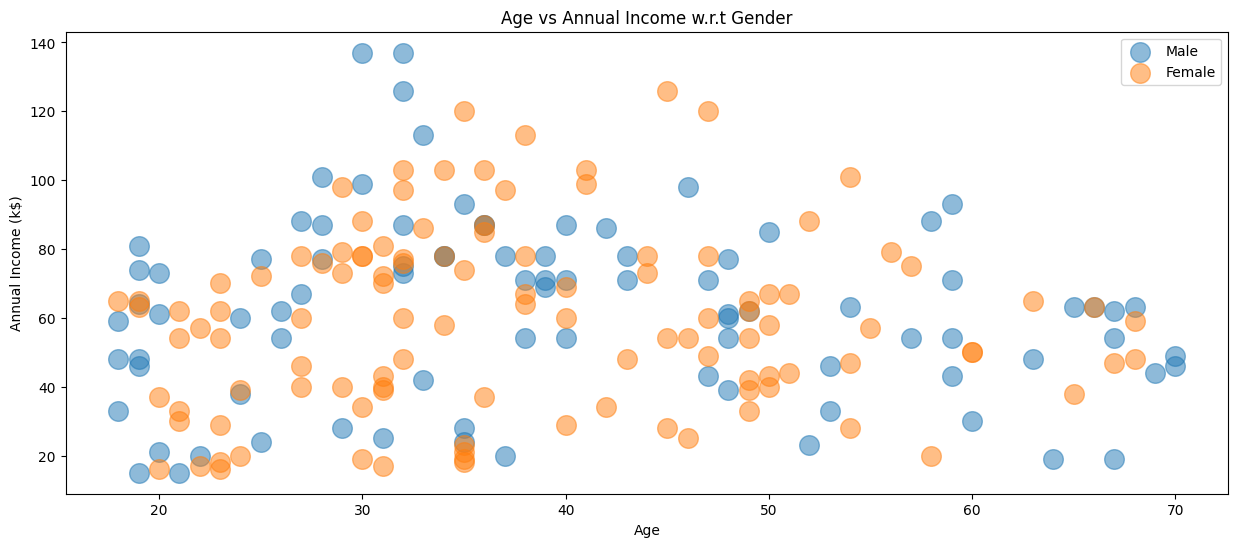

In [93]:
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)', data=df[df['Gender'] == gender],
               s=200, alpha=0.5, label=gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

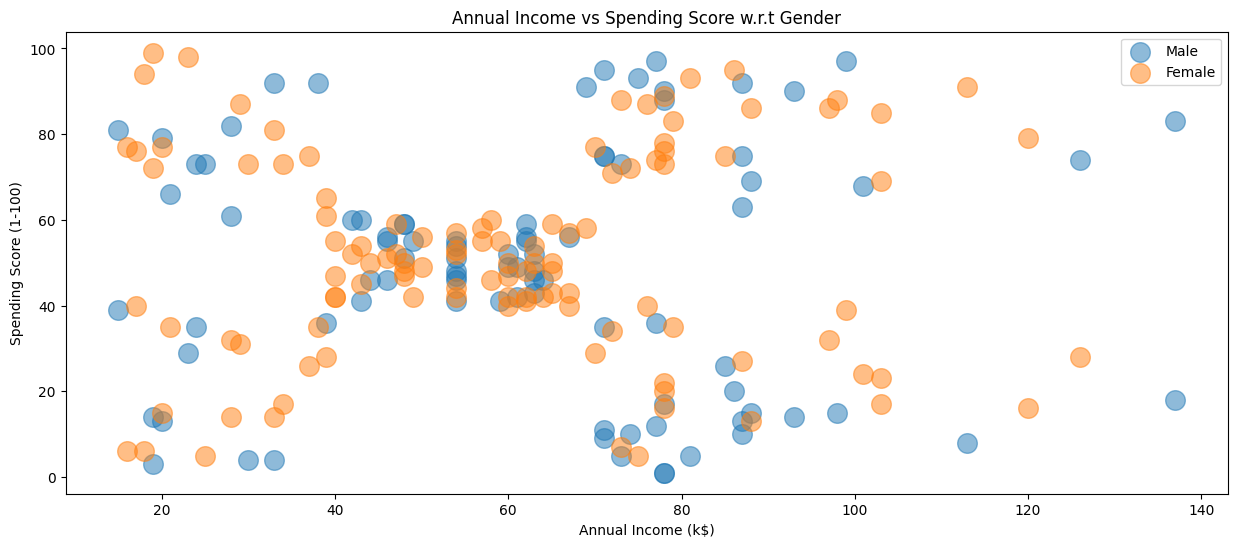

In [94]:
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df[df['Gender'] == gender],
               s=200, alpha=0.5, label=gender)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

**Distribution of values in Age , Annual Income and Spending Score according to Gender**

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

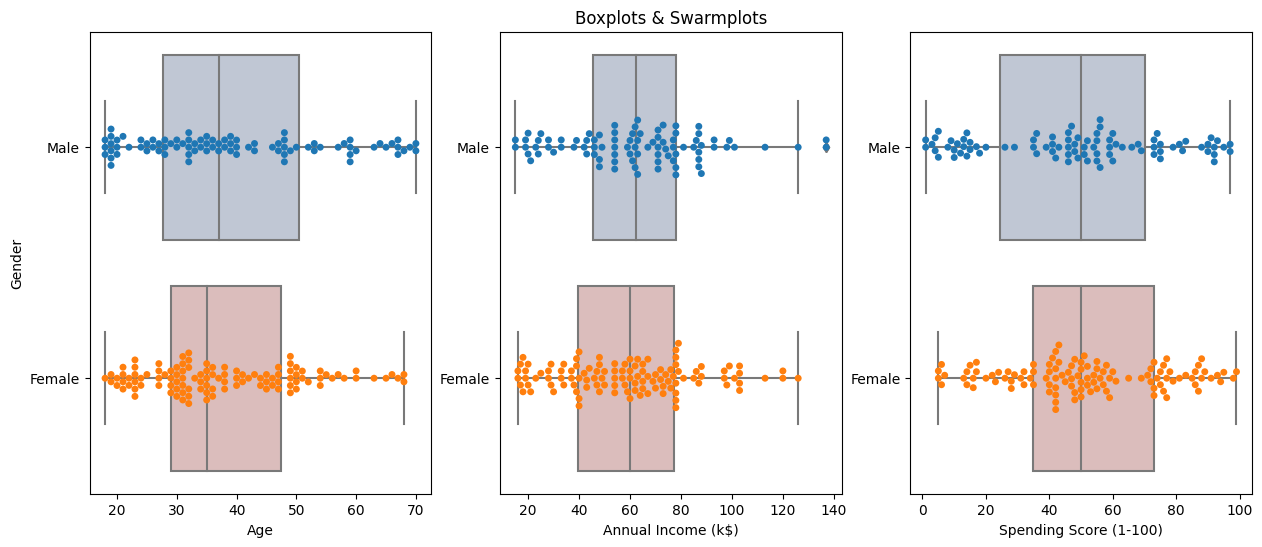

In [95]:
plt.figure(1, figsize=(15, 6))
n = 0
for cols in df.columns[2:]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x = cols, y = 'Gender', data=df, palette='vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

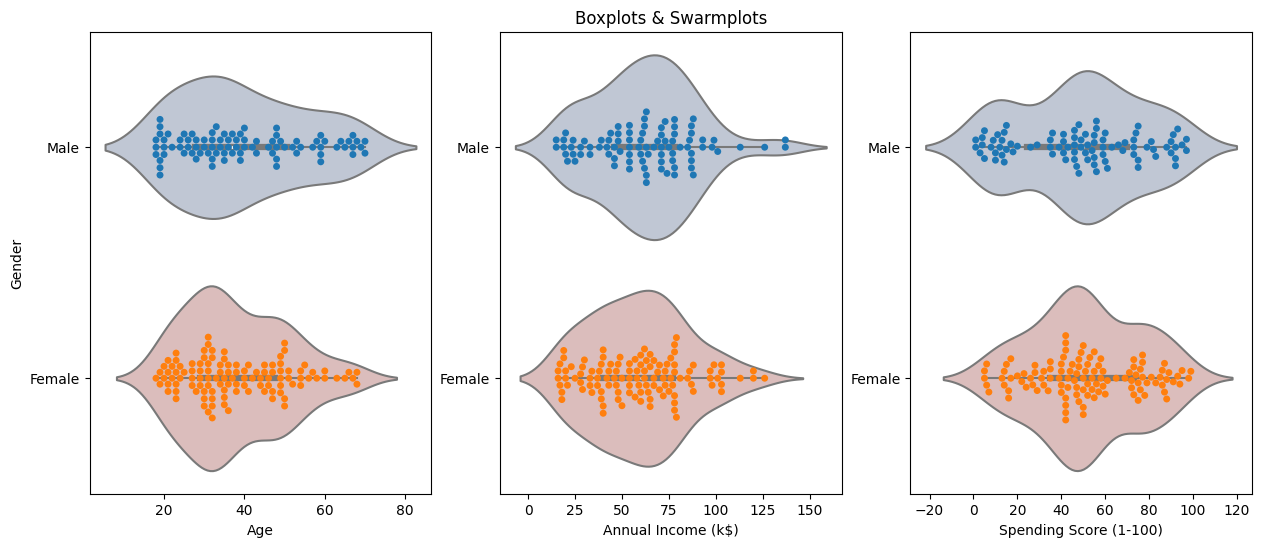

In [96]:
plt.figure(1, figsize=(15, 6))
n = 0
for cols in df.columns[2:]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5)
    sns.violinplot(x = cols, y = 'Gender', data=df, palette='vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

[To know about boxplot in more detail.](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

## Clustering using KMeans

#### **Segmentation using Age and Spending Score**

Selecting n_clusters based on inertia(mean squared distance between each instance and it's closest centroid)

[Visualize KMeans]()

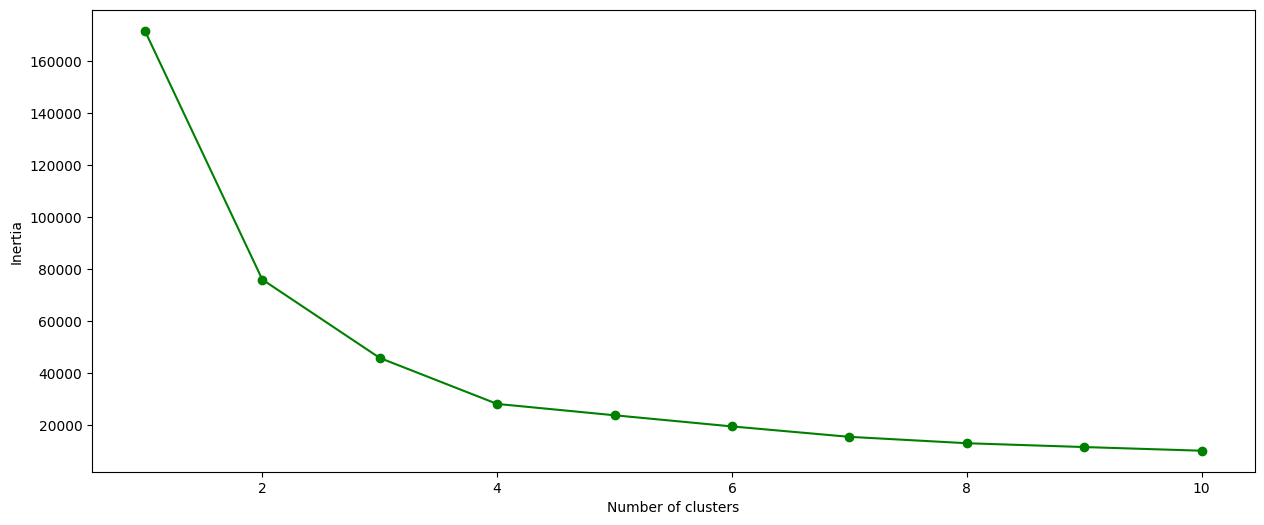

In [98]:
plt.figure(1, figsize=(15, 6))
plt.plot(range(1, 11), inertias, 'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [99]:
kmeans = KMeans(n_clusters=4, algorithm='elkan', tol=1e-4, random_state=42)
kmeans.fit(X)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [100]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'ko', markersize=5)

def plot_centroids(centroids, circle_color='r', cross_color='w'):
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8, 
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0],  maxs[0], mins[1], maxs[1]), cmap='Pastel2')
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    
    if show_xlabels:
        plt.xlabel('Age')
    
    if show_ylabels:
        plt.ylabel('Spending Score (1-100)')

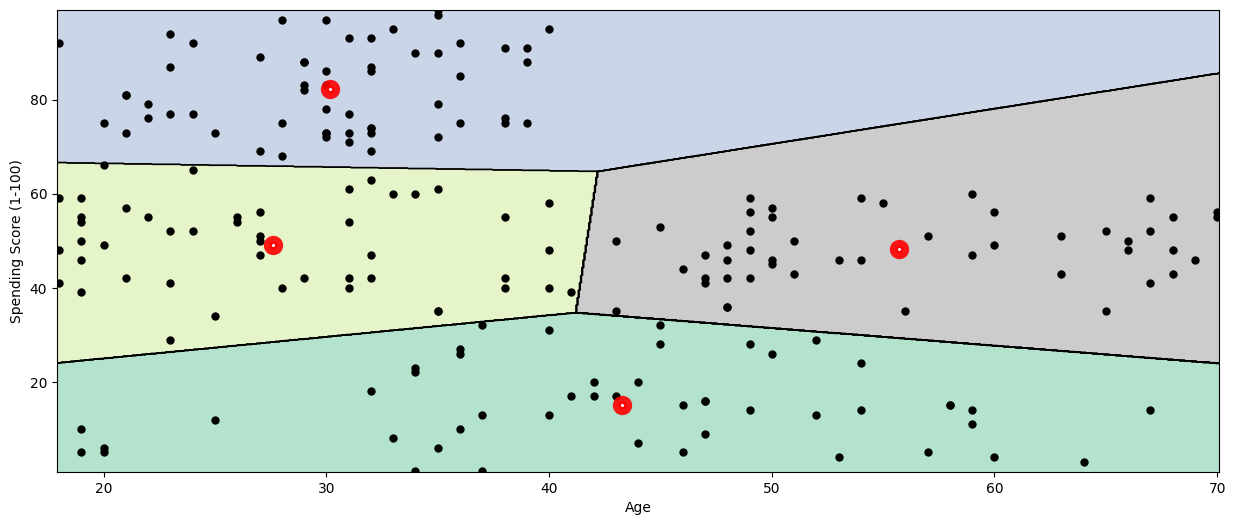

In [101]:
plt.figure(1, figsize=(15, 6))
plot_decision_boundaries(kmeans, X)
plt.show()

#### **Segmentation using Annual Income and Spending Score**

In [102]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
inertias = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, algorithm='elkan', tol=1e-4, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

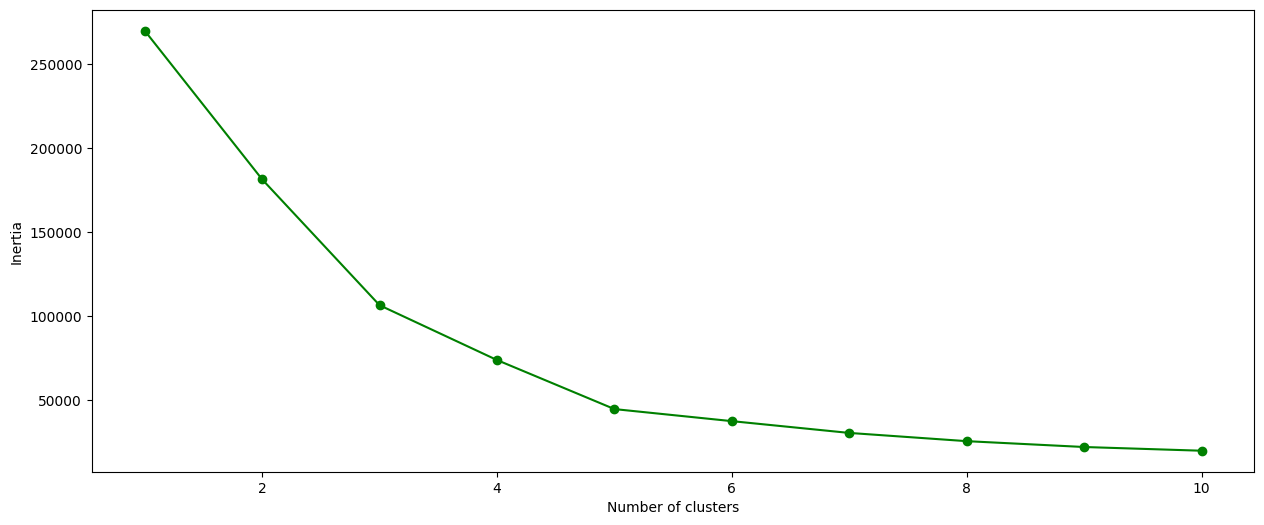

In [103]:
plt.figure(1, figsize=(15, 6))
plt.plot(range(1, 11), inertias, 'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

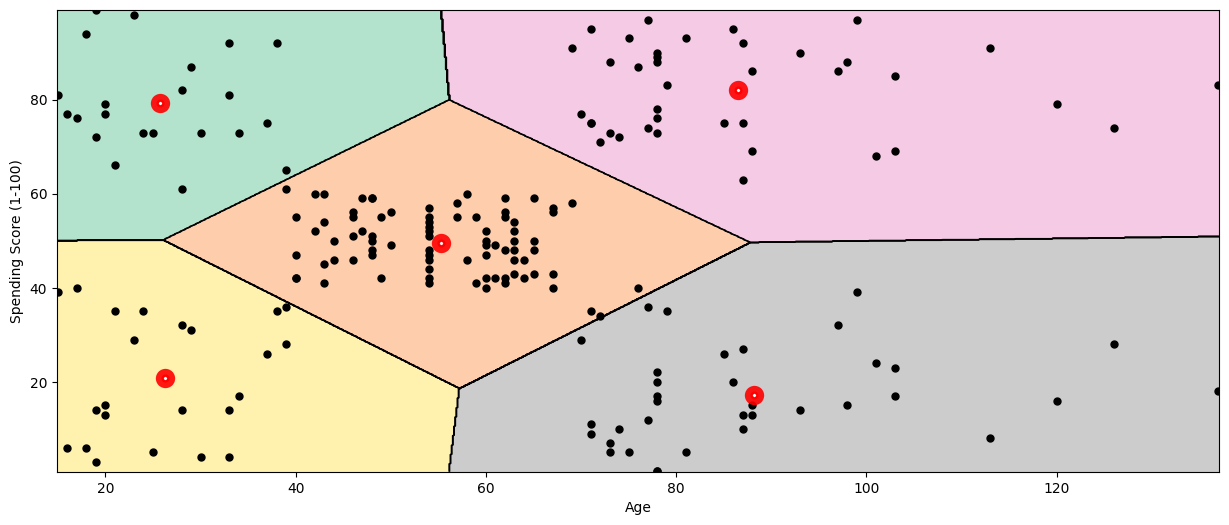

In [104]:
kmeans = KMeans(n_clusters=5, algorithm='elkan', tol=1e-4, random_state=42)
kmeans.fit(X)
plt.figure(1, figsize=(15, 6))
plot_decision_boundaries(kmeans, X)
plt.show()

In [105]:
KMeans?